# IRIS FLOWER CLASSIFICATION

In [1]:

#_____________________________________________ IRIS-FLOWER-CLASSIFICATION _________________________________________
#          Author: Ayush Gupta
#           Batch: March(A39)
#         Company: CodSoft
#          Domain: Data Science
#         College: GNIOT Institute of Management Studies

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Dataset

In [3]:
#calling the dataset
df=pd.read_csv(r"C:\Users\ayush\Downloads\IRIS.csv")

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#_____________________dimension

print(f'''No of rows:{df.shape[0]}
No of Columns: {df.shape[1]}''')

No of rows:150
No of Columns: 5


In [7]:
#checking for the imbalances

df['species'].value_counts()


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Measurements')

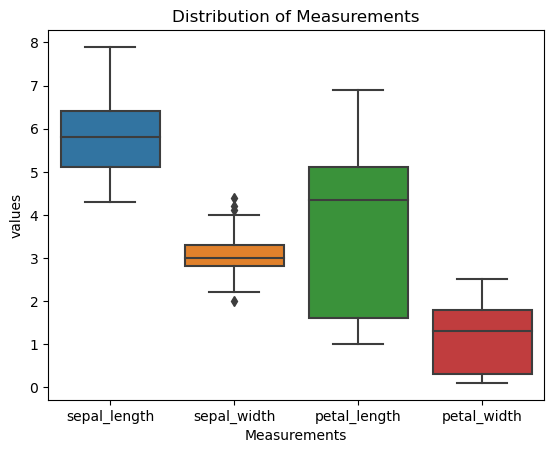

In [8]:
#_____Distributions of the variables
df1=df.drop('species', axis=1).melt(value_vars=df.drop('species',axis=1).columns)
sns.boxplot(df1,x='variable',y='value')
plt.xlabel('Measurements')
plt.ylabel('values')
plt.title('Distribution of Measurements')

In [9]:
#____________Forming Xand y
X= df.drop('species',axis=1)
y=df['species']

In [11]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101,stratify=y)
print(f'''X Train :{X_train.shape}
X Test: {X_test.shape}
X Train: {y_train.shape}
y Test: {y_test.shape}''')

X Train :(120, 4)
X Test: (30, 4)
X Train: (120,)
y Test: (30,)


In [12]:
# Define your preprocessing pipeline
preprocess = Pipeline([
    ('scaler', StandardScaler())
])

# Define your model pipeline
model = Pipeline([
    ('preprocess', preprocess),
    ('Classifier', LogisticRegression(multi_class='multinomial'))
])

# Fit the model with the correct variable names
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('Classifier', LogisticRegression(multi_class='multinomial'))])

In [13]:
# Now you can make predictions
y_pred = model.predict(X_test)
y_pred


array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

Text(0.5, 1.0, 'Confusion Matrix for the classification')

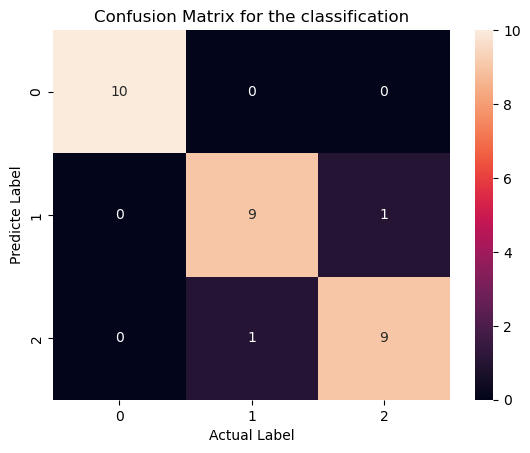

In [14]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Label')
plt.ylabel('Predicte Label')
plt.title('Confusion Matrix for the classification')

In [15]:
#classification
cr=classification_report(y_test,y_pred)

print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [16]:
#saving the model
with open('./model.pkl','wb')as fp:pickle.dump(model,fp)